In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [145]:
plt.style.use('seaborn-deep')

In [146]:
filepathname = 'c:\\Users\\micha\\Documents\\GitHub\\diabetes_readmissions\\diabetes.csv'
df = pd.read_csv(filepathname, header=0,)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Start of Section on Functions

In [147]:
# Helper function that will show normalized value counts for features
def show_column_values():
    for feature in df.columns:
        print("Name of Feature:", feature)
        print(df[feature].value_counts(normalize=True))
        print("\n")

In [148]:
# Helper function to generate specific univariate plots
def create_plots(myXaxis,myYaxis,myXlabel,myYlabel,myTitle,myPlot,fsize=7):
    
    fig, notch_ax = plt.subplots(1, 1, figsize = (fsize,fsize))
    if myPlot == "Boxplot":
        sns.boxplot(ax = notch_ax,x = myXaxis, y = myYaxis, data = df,notch=True)
    elif myPlot == "Barplot":
        df_sub = df.groupby([myXaxis],as_index=False)[[myYaxis]].count()
        sns.barplot(ax = notch_ax, data = df_sub, x = myXaxis, y = myYaxis,edgecolor='black')
    elif myPlot == "Heatmap":
        sns.heatmap(ax = notch_ax, data=df.corr(),annot=True)
    elif myPlot == "Histplot":
        sns.histplot(data=df, x = myXaxis)

    plt.title(myTitle)
    plt.xlabel(myXlabel)
    plt.ylabel(myYlabel)

    # Heatmap does not need to have y axis label formatted
    if myPlot != "Heatmap":
        plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.show()

# End of Section on Functions

In [149]:
df.shape

(101766, 50)

In [150]:
tips = sns.load_dataset("tips")

In [151]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [152]:
df.nunique()

encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    4
A1Cresult                        4
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

In [153]:
# Inspect the features that need to be deleted
show_column_values()

Name of Feature: encounter_id
2278392      0.00001
190792044    0.00001
190790070    0.00001
190789722    0.00001
190786806    0.00001
              ...   
106665324    0.00001
106657776    0.00001
106644876    0.00001
106644474    0.00001
443867222    0.00001
Name: encounter_id, Length: 101766, dtype: float64


Name of Feature: patient_nbr
88785891     0.000393
43140906     0.000275
1660293      0.000226
88227540     0.000226
23199021     0.000226
               ...   
11005362     0.000010
98252496     0.000010
1019673      0.000010
13396320     0.000010
175429310    0.000010
Name: patient_nbr, Length: 71518, dtype: float64


Name of Feature: race
Caucasian          0.747784
AfricanAmerican    0.188766
?                  0.022336
Hispanic           0.020017
Other              0.014799
Asian              0.006299
Name: race, dtype: float64


Name of Feature: gender
Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: gender, dtype: float64


Name o

The features_excluded list below are features to be dropped.
The reason for excluding each feature are:
1. encounter_id: Is an autonumber for each row, a counter for rows in the dataset, does not drive what is happening to the target: readmitted
2. weight: Over 97% of the records are missing the weight value
3. payer_code: Over 40% of the records are missing the payor code, payers don't make the decision on when to admit
4. medical_specialty: Over 49% of the records are missing the specialty value, specialty is not making the decision to admit. It is based on the clinical findings which are determined from the assessment of the health team
5. diag_1, diag_2, and diag_3: Based on an average of 740 diagnosis codes listed for each column it would be impractical to one hot encode each column into 2,100 columns. The next feature of number_diagnoses is more valuable for seeing the impact of co-morbidity; the presence of two or more diseases
6. examide and citoglipton: Were not listed on any encounter as being taken


In [154]:
features_excluded = ['encounter_id','weight','payer_code','medical_specialty','diag_1','diag_2','diag_3','examide','citoglipton']

In [155]:
# Dropping columns
df.drop(columns=features_excluded,inplace=True)

In [156]:
# Inspect the features for rows that need to be deleted
# An imputer is not going to appropriate for this rows
show_column_values()

Name of Feature: patient_nbr
88785891     0.000393
43140906     0.000275
1660293      0.000226
88227540     0.000226
23199021     0.000226
               ...   
11005362     0.000010
98252496     0.000010
1019673      0.000010
13396320     0.000010
175429310    0.000010
Name: patient_nbr, Length: 71518, dtype: float64


Name of Feature: race
Caucasian          0.747784
AfricanAmerican    0.188766
?                  0.022336
Hispanic           0.020017
Other              0.014799
Asian              0.006299
Name: race, dtype: float64


Name of Feature: gender
Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: gender, dtype: float64


Name of Feature: age
[70-80)     0.256156
[60-70)     0.220928
[50-60)     0.169565
[80-90)     0.168986
[40-50)     0.095169
[30-40)     0.037095
[90-100)    0.027445
[20-30)     0.016282
[10-20)     0.006790
[0-10)      0.001582
Name: age, dtype: float64


Name of Feature: admission_type_id
1    0.530531
3    0.18541

In [157]:
# Drop rows with missing values
# Listing features with rows missing values
num_rows = 0
missing_values = ['race']
for feature in missing_values:
    df_filter = df[df[feature] == '?']
    num_rows += df_filter.shape[0]
    print("Number of rows to be dropped: {:,.0f} with value of '?' in feature {}".format(df_filter.shape[0],feature))
    df.drop(df_filter.index, inplace = True)
print("Total number of rows deleted: {:,.0f}".format(num_rows))
print("Number of rows in dataframe after rows are deleted: {:,.0f}".format(df.shape[0]))


Number of rows to be dropped: 2,273 with value of '?' in feature race
Total number of rows deleted: 2,273
Number of rows in dataframe after rows are deleted: 99,493


In [158]:
# Check for the existence of duplicate records
df.duplicated().sum()

0

In [159]:
show_column_values()

Name of Feature: patient_nbr
88785891     0.000402
43140906     0.000281
88227540     0.000231
23199021     0.000231
1660293      0.000231
               ...   
25768926     0.000010
9788337      0.000010
29974896     0.000010
49159611     0.000010
175429310    0.000010
Name: patient_nbr, Length: 69668, dtype: float64


Name of Feature: race
Caucasian          0.764868
AfricanAmerican    0.193079
Hispanic           0.020474
Other              0.015137
Asian              0.006443
Name: race, dtype: float64


Name of Feature: gender
Female             0.53848
Male               0.46151
Unknown/Invalid    0.00001
Name: gender, dtype: float64


Name of Feature: age
[70-80)     0.255988
[60-70)     0.221000
[50-60)     0.169811
[80-90)     0.168856
[40-50)     0.095132
[30-40)     0.037178
[90-100)    0.027379
[20-30)     0.016192
[10-20)     0.006855
[0-10)      0.001608
Name: age, dtype: float64


Name of Feature: admission_type_id
1    0.531696
3    0.186023
2    0.178766
6    0.052516
5

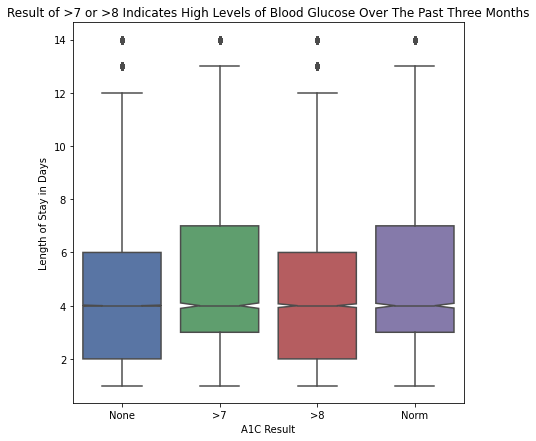

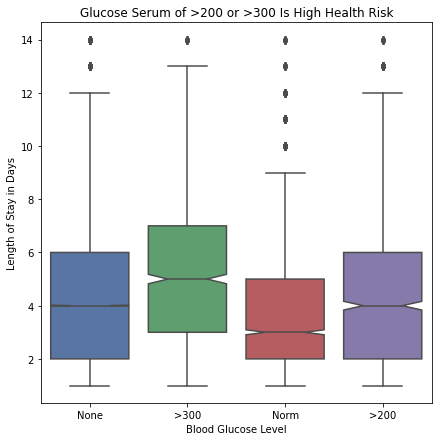

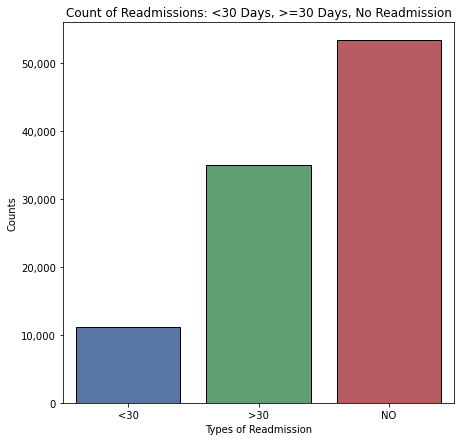

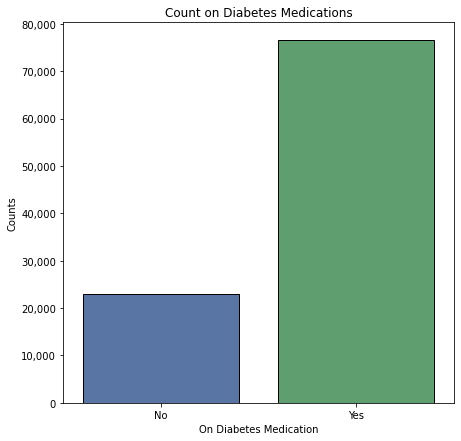

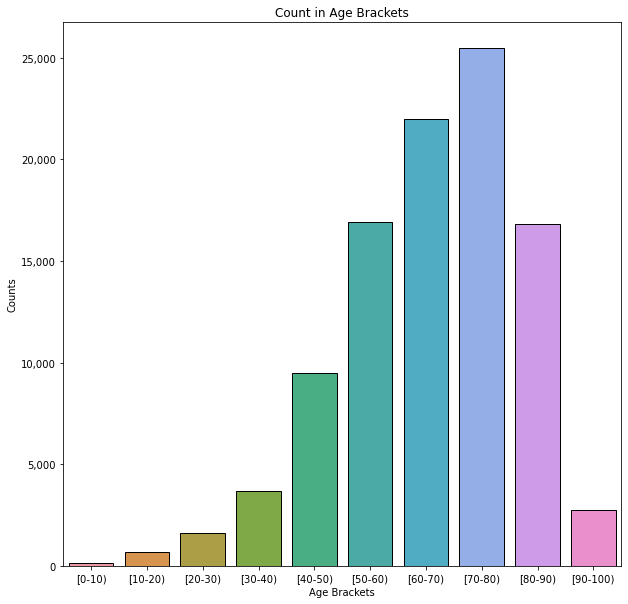

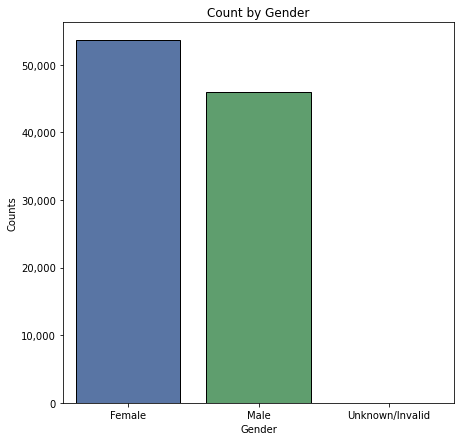

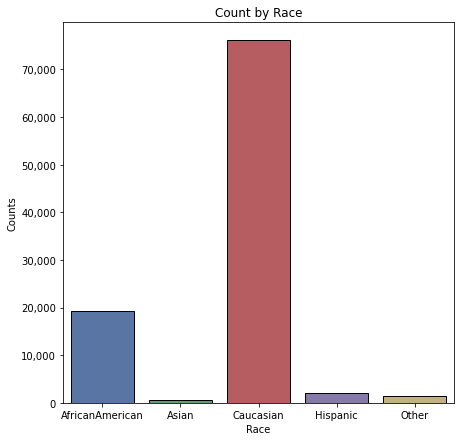

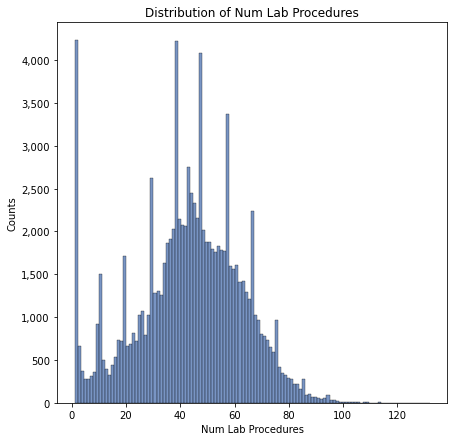

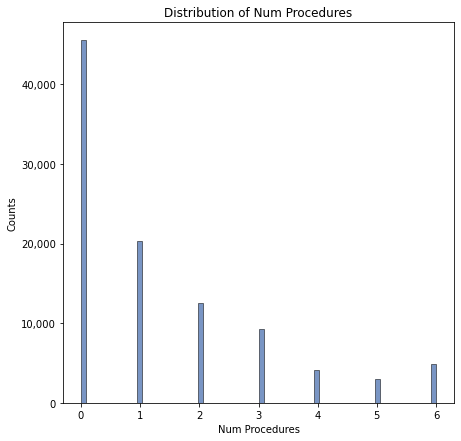

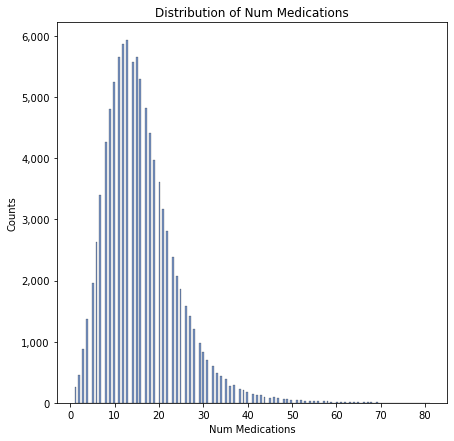

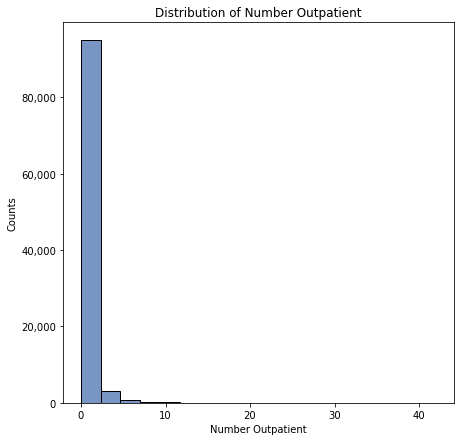

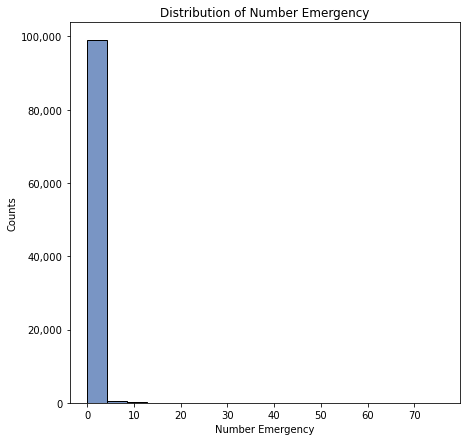

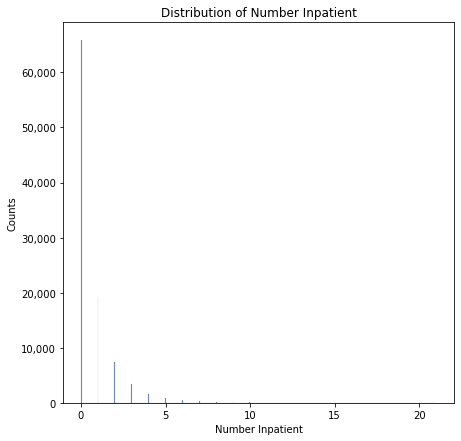

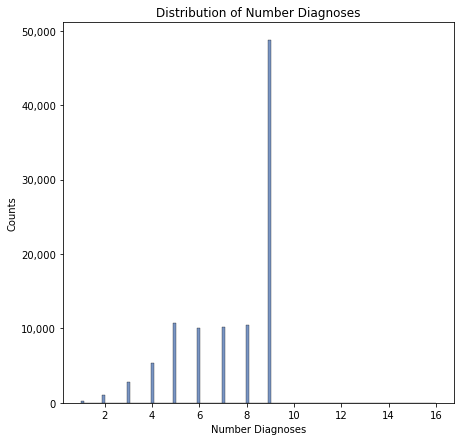

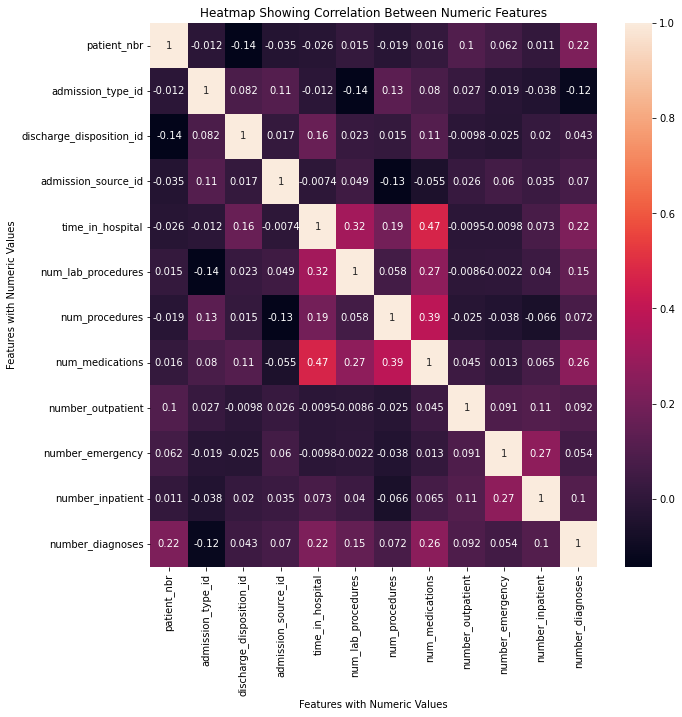

In [160]:
# Creating the key univariate plots on features
# create_plot function accepts the following parameters and generates a specific type of plot
#(xAxis-Data, yAxis-Data, xAxis-Label,yAxis-Label,Title of Plot, Plot type, Override default figsize)

# Create a number of Boxplots
create_plots('A1Cresult','time_in_hospital','A1C Result','Length of Stay in Days','Result of >7 or >8 Indicates High Levels of Blood Glucose Over The Past Three Months','Boxplot')

create_plots('max_glu_serum','time_in_hospital','Blood Glucose Level','Length of Stay in Days','Glucose Serum of >200 or >300 Is High Health Risk','Boxplot')

# Create a number of Barplots
create_plots('readmitted','patient_nbr','Types of Readmission','Counts','Count of Readmissions: <30 Days, >=30 Days, No Readmission','Barplot')

create_plots('diabetesMed','patient_nbr','On Diabetes Medication','Counts','Count on Diabetes Medications','Barplot')

create_plots('age','patient_nbr','Age Brackets','Counts','Count in Age Brackets','Barplot',10)

create_plots('gender','patient_nbr','Gender','Counts','Count by Gender','Barplot')

create_plots('race','patient_nbr','Race','Counts','Count by Race','Barplot')

# Create a number of Histplots
histplot_features_list = ['num_lab_procedures', 'num_procedures',\
    'num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']

for plot in histplot_features_list:
    plotLbl = plot.replace("_"," ")
    plotLbl = plotLbl.title()
    create_plots(plot,'blank',plotLbl,'Counts','Distribution of ' + plotLbl,'Histplot')

# Create Heatmap to show correlation
create_plots('Features with Numeric Values','Features with Numeric Values','Features with Numeric Values','Features with Numeric Values','Heatmap Showing Correlation Between Numeric Features','Heatmap',10)

<h1>Start of Citation and References Section</h1>

1) Source of data is UCI Machine Learning Repository, URL is: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

2) The data is submitted on provided the Virigina Commonwealth University, on Diabetes related admission on 130-US hospitals for years 1999 to 2008.

3) Target is predicting classifying admissions as re-admit; less than 30, more than 30 or none. 

4) This is a classification problem

5) Data has 55 features and 6) 100,000 rows of data

7) Dataset is has a lot of rows, it is going to test my healthcare background. One of the reasons why I choose this data, I have done a lot of work on clinical outcomes.

Additional Sources and Citations:
1. List of features and descriptions: https://www.hindawi.com/journals/bmri/2014/781670/tab1/
2. Open Access article: https://www.hindawi.com/journals/bmri/2014/781670/
3. Citation: Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, John N. Clore, "Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records", BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014. https://doi.org/10.1155/2014/781670